In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv("car_age_price.csv")

In [3]:
df.head(10)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


### Check the basic details of the dataset

In [4]:
df.shape

(112, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
df.dtypes

Year     int64
Price    int64
dtype: object

In [7]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
df.isna().sum()

Year     0
Price    0
dtype: int64

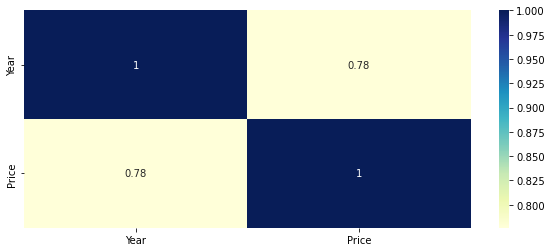

In [9]:
corrmatrix = df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, annot=True, cmap='YlGnBu');

In [10]:
df.columns

Index(['Year', 'Price'], dtype='object')

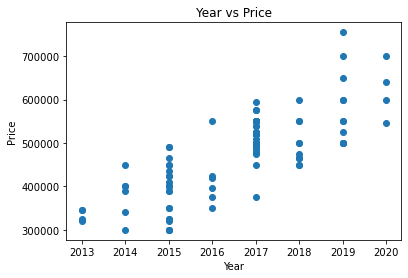

In [11]:
plt.scatter(df['Year'], df['Price'])
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

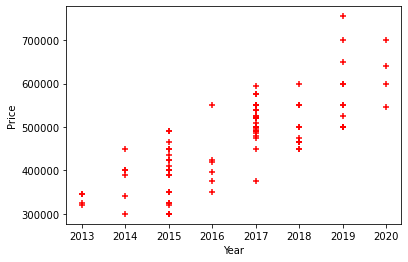

In [47]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Price')
plt.scatter(df.Year,df.Price, color = 'red', marker='+')

### Linear Regression

In [13]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [18]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
print('Mean Squared Error is :', mean_squared_error(y_test, predictions))
print('R Squared Value is :', r2_score(y_test, predictions))

Mean Squared Error is : 4326906256.829671
R Squared Value is : 0.36759313425902185


In [46]:
 ### predict the possible price of a 2022 model second-hand grand i10?

In [43]:
lr.predict([[2022]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

### Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

In [39]:
Lass_reg_model = Lasso(alpha = .2)
model1 = Lass_reg_model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [40]:
print('Mean Squared Error is :', mean_squared_error(y_test, predictions))
print('R Squared Value is :', r2_score(y_test, predictions))

Mean Squared Error is : 4326906256.829671
R Squared Value is : 0.36759313425902185


In [44]:
Lass_reg_model.predict([[2022]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743601.16761032])